<a href="https://colab.research.google.com/github/meghanabindu/Internship-AI-ML/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 114855736.43240231
R-squared: 0.9971286065891899


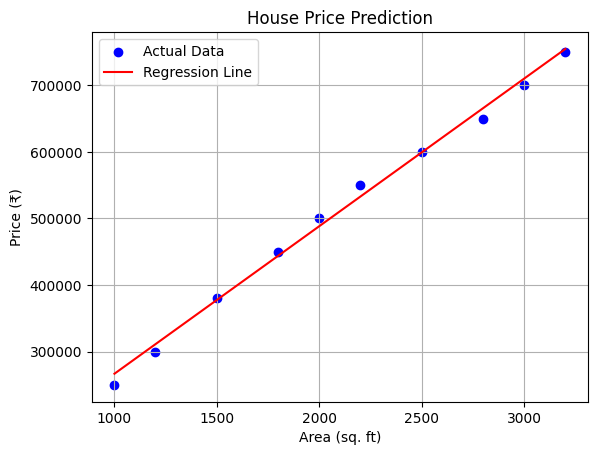

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Step 1: Create a sample dataset
# Let's say we are predicting house price based on area (in square feet)
X = np.array([1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200]).reshape(-1, 1) # Area in sq. ft
y = np.array([250000, 300000, 380000, 450000, 500000, 550000, 600000, 650000, 700000, 750000]) # Price in ₹

# Split data into training and testing sets (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 2: Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (optional)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ✅ Step 3: Visualize the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (₹)')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Split into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Download the Titanic dataset
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2025-06-03 20:01:26--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-06-03 20:01:26 (4.21 MB/s) - ‘titanic.csv’ saved [60302/60302]



Number of Survivors (0 = No, 1 = Yes):
survived
0    549
1    342
Name: count, dtype: int64


<ipython-input-14-40d9541a076a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='pastel')


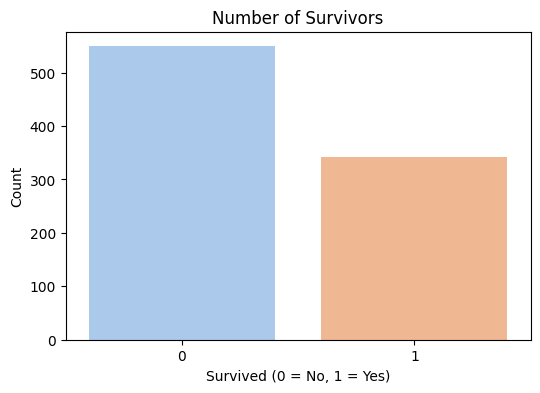


Model Accuracy: 0.7552447552447552

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



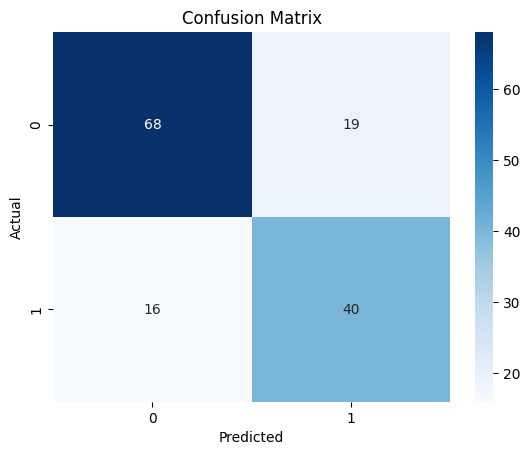

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display number of survivors and non-survivors
survival_counts = df['survived'].value_counts().sort_index()
print("Number of Survivors (0 = No, 1 = Yes):")
print(survival_counts)

# Plot number of survivors
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Number of Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Data preprocessing
data = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
X = data[['pclass', 'sex', 'age', 'fare']]
y = data['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVM model (RBF kernel)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Take a test input and predict
index = int(input("Enter a test sample number (0 to {}): ".format(len(X_test) - 1)))

sample = X_test[index].reshape(1, -1)
prediction = model.predict(sample)

print("Predicted digit is:", prediction[0])
print("Actual digit was:", y_test[index])


Enter a test sample number (0 to 359): 8
Predicted digit is: 8
Actual digit was: 8
